In [34]:
# This Notebook is for measuring the popularity of test items
from experiments.data_loader import DataLoader
from shared.enums import Sentiment
import numpy as np
from scipy import stats 
from matplotlib import pyplot as plt 
import seaborn as sns

data_loader = DataLoader('../../data/default/split_0')

entity_ratings = dict()

for user, ratings in data_loader.training().items():
    for item, rating in ratings.training.items():
        entity_ratings[item] = entity_ratings.get(item, 0) + 1
        pass

print(entity_ratings)

{10677: 634, 165: 49, 13186: 175, 6281: 607, 14544: 369, 335: 544, 156: 412, 13902: 605, 7997: 535, 8260: 201, 5525: 315, 17125: 50, 5001: 7, 2472: 3, 829: 14, 12387: 74, 17631: 284, 10044: 2, 11037: 288, 18692: 530, 14246: 12, 14504: 112, 21: 71, 15429: 5, 1934: 28, 7330: 81, 18338: 21, 10225: 3, 7448: 52, 5783: 51, 16897: 17, 15442: 19, 8425: 13, 3654: 14, 13423: 13, 13990: 101, 6262: 2, 11629: 6, 16965: 2, 15961: 12, 9468: 10, 13809: 9, 7101: 4, 6924: 9, 13622: 17, 14669: 5, 5805: 2, 5636: 3, 18704: 1, 15120: 2, 11590: 22, 3956: 2, 2010: 3, 2872: 5, 11811: 5, 6620: 4, 3733: 5, 1596: 4, 11891: 2, 11295: 2, 12311: 2, 1632: 3, 12897: 2, 11235: 2, 14601: 2, 6771: 1, 14984: 1, 12881: 1, 15259: 2, 16947: 1, 1055: 1, 10032: 1, 4782: 2, 13464: 1, 9912: 1, 9463: 1, 834: 1, 9534: 324, 2144: 197, 17281: 403, 3736: 156, 2318: 68, 11959: 55, 869: 56, 523: 202, 6928: 84, 4693: 43, 12929: 163, 9355: 32, 6145: 55, 12014: 11, 14990: 37, 17043: 20, 6741: 33, 7520: 24, 10029: 31, 17972: 41, 17266: 67,

np.mean(differences)=7.511248946354853
DescribeResult(nobs=241, minmax=(1, 112), mean=21.70124481327801, variance=455.3603734439834, skewness=1.6450292897546699, kurtosis=3.0733885393854887)
np.median(positive_ratings)=14.0
DescribeResult(nobs=24100, minmax=(1, 112), mean=15.551535269709543, variance=161.4421757415254, skewness=1.5185442698293856, kurtosis=3.7374257262676833)
np.median(unseen_ratings)=12.0
13.0
1.0


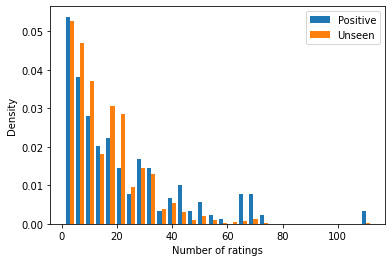

In [35]:
# How popular are positive items compared to unseen samples

positive_ratings = list()
unseen_ratings = list()
differences = list()

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        unseen_items = cold_set.ranking.sentiment_samples[Sentiment.UNSEEN]
        
        for item in positive_items:
            positive_ratings.append(entity_ratings.get(item, 0))
            
        for item in unseen_items:
            unseen_ratings.append(entity_ratings.get(item, 0))
            
        differences.append(np.mean(positive_ratings) - np.mean(unseen_ratings))

print(f'{np.mean(differences)=}')
print(stats.describe(positive_ratings))
print(f'{np.median(positive_ratings)=}')
print(stats.describe(unseen_ratings))
print(f'{np.median(unseen_ratings)=}')

print(f'{np.percentile(positive_ratings, 45)}')
print(f'{np.percentile(unseen_ratings, 3)}')
plt.hist([positive_ratings, unseen_ratings], bins=30, label=['Positive', 'Unseen'], density=True)
plt.legend(loc='upper right')
plt.xlabel('Number of ratings')
plt.ylabel('Density')
#plt.xlim([0, 30])
plt.savefig('sampling_popularity_bias.pdf', bbox_inches='tight')

In [36]:
# How many unique positive samples we have per test user
test_ratings = dict()
unseen_ratings = dict()
lengths = []

for user, ratings in data_loader.testing().items():
    items = set()
    for cold_set in ratings.sets:
        positive_items = cold_set.ranking.sentiment_samples[Sentiment.POSITIVE]
        
        items.update(positive_items)

    lengths.append(len(items))

print(stats.describe(lengths))

DescribeResult(nobs=241, minmax=(1, 1), mean=1.0, variance=0.0, skewness=0.0, kurtosis=-3.0)
